In [28]:
from closure_funcs import *
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import matplotlib.colors as mcolors
from scipy.stats import linregress
import seaborn as sns

In [2]:
d = pd.read_csv('../tables/merged_final.csv')
#data = d.dropna(subset=['Longitude', 'Latitude', 'k_obs'])

In [6]:
d['OMF'] = d['Org_Ave_IsoK_STP']/d['ams_tot']

In [10]:
len(bins)

11

In [11]:
len(labels)

9

<Figure size 1000x600 with 0 Axes>

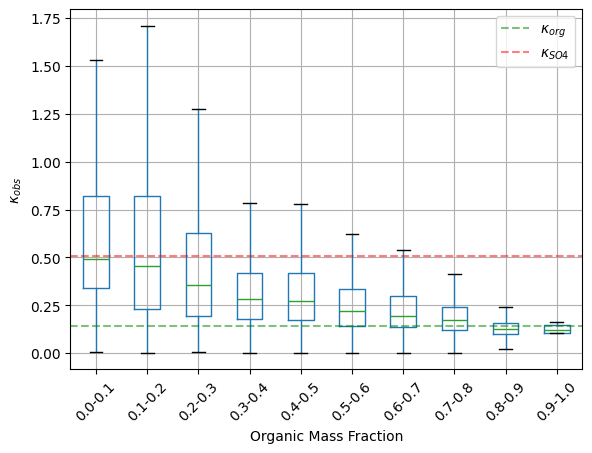

In [25]:
# Assuming 'd' is your DataFrame containing 'CO_ppm' and 'k_obs' columns
# Define CO_ppm ranges (bins) - adjust as needed
#d_sub = sub_m2[sub_m2['CCN_SS']==0.37]
d_sub = d
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
labels = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
plt.show()
# Bin 'CO_ppm' values
d_sub['OMF_range'] = pd.cut(d_sub['OMF'], bins=bins, labels=labels, right=False)

# Plot boxplot of 'k_obs' for each CO_ppm range
plt.figure(figsize=(10, 6))
d_sub.boxplot(column='k_obs', by='OMF_range', grid=True, showfliers=False)
plt.title('')
plt.axhline(.14, c='green', ls='--', alpha=.5, label=r'$\kappa _{org}$')
plt.axhline(.507, c='red', ls='--', alpha=.5, label=r'$\kappa _{SO4}$')
plt.legend()
plt.suptitle('')  # Removes the automatic boxplot subtitle
plt.xlabel('Organic Mass Fraction')
plt.ylabel(r'$\kappa _{obs}$')
plt.xticks(rotation=45)
#plt.ylim([0, 0.15])
plt.savefig('../figures/k_obs_v_OMF.png', dpi=300, bbox_inches='tight')
plt.show()

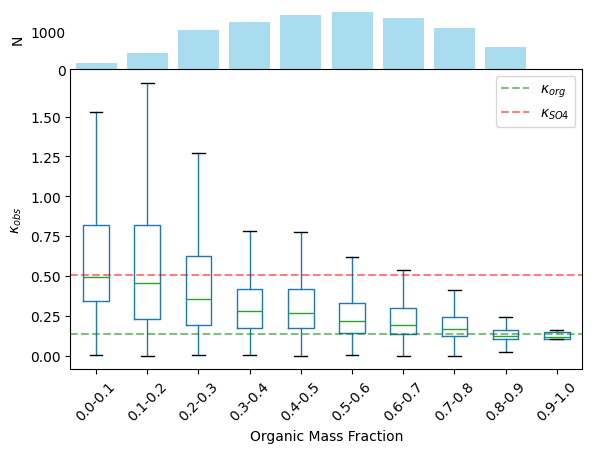

In [80]:
# Define the OMF bins and labels
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
labels = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
d_sub = d.copy()

# Bin 'OMF' values
d_sub['OMF_range'] = pd.cut(d_sub['OMF'], bins=bins, labels=labels, right=False)

# Create figure and gridspec layout for distribution on top and boxplot below
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 5]}, sharex=True)

# Count the number of points in each 'OMF_range' bin
counts = d_sub['OMF_range'].value_counts().reindex(labels).fillna(0)  # Ensure the correct order and fill missing bins with 0

# Plot the counts as a bar chart on the top subplot
ax[0].bar(np.linspace(1,10,10), counts.values, color='skyblue', alpha=0.7)
ax[0].set_ylabel('N')
ax[0].grid(True, axis='y')

# Plot boxplot of 'k_obs' for each OMF_range on the bottom subplot
d_sub.boxplot(column='k_obs', by='OMF_range', grid=False, showfliers=False, ax=ax[1])
ax[1].axhline(.14, color='green', linestyle='--', alpha=0.5, label=r'$\kappa _{org}$')
ax[1].axhline(.507, color='red', linestyle='--', alpha=0.5, label=r'$\kappa _{SO4}$')
ax[1].legend()
ax[1].set_xlabel('Organic Mass Fraction')
ax[1].set_ylabel(r'$\kappa _{obs}$')
ax[1].set_xticklabels(labels, rotation=45)
plt.subplots_adjust(hspace=0)
# Adjust plot and save
plt.suptitle('')  # Remove automatic title
ax[1].set_title('')
ax[1].set_yticks([0,.25,.5,.75,1,1.25,1.5])
for spine in ax[0].spines.values():
    spine.set_visible(False)
ax[0].grid(False)
ax[0].tick_params(axis='both', which='both', length=0)
#plt.tight_layout()
plt.savefig('../figures/k_obs_v_OMF_with_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [49]:
counts

OMF_range
0.0-0.1     168
0.1-0.2     440
0.2-0.3    1059
0.3-0.4    1263
0.4-0.5    1445
0.5-0.6    1523
0.6-0.7    1366
0.7-0.8    1103
0.8-0.9     582
0.9-1.0      10
Name: count, dtype: int64

In [42]:
np.linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

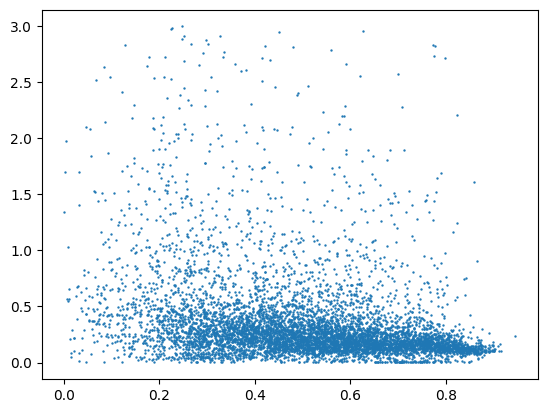

In [8]:
plt.scatter(d['OMF'], d['k_obs'], s=.5)